In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression

In [3]:
df = pd.read_csv("behaviour_simulation_train.csv")

In [4]:

df.shape
df.info
df.isnull().sum()
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


Data preprocessing

In [5]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'])
df['media'].fillna('no_media')
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['datetime'])


In [6]:
df.head()

,id,date,likes,content,username,media,inferred company,has_media,datetime
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46


<Axes: xlabel='likes', ylabel='Count'>

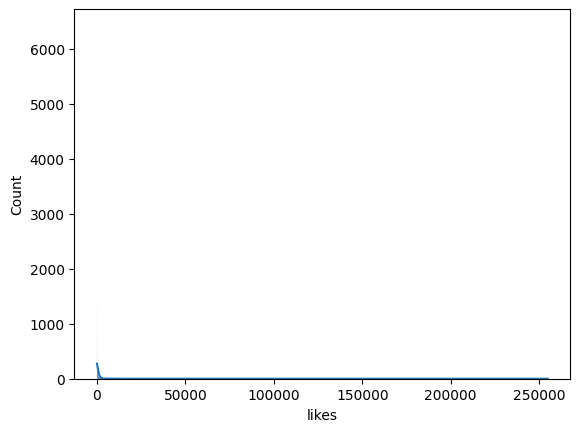

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['likes'], kde=True)

In [8]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df.head()

,id,date,likes,content,username,media,inferred company,has_media,datetime,hour,day_of_week
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0,Saturday
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,10,Saturday
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,19,Tuesday
3,4,2020-10-01 11:40:09,152,"1st in europe to be devastated by covid-19, it...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,True,2020-10-01 11:40:09,11,Thursday
4,5,2018-10-19 14:30:46,41,congratulations to pauletha butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-10-19 14:30:46,14,Friday


In [9]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

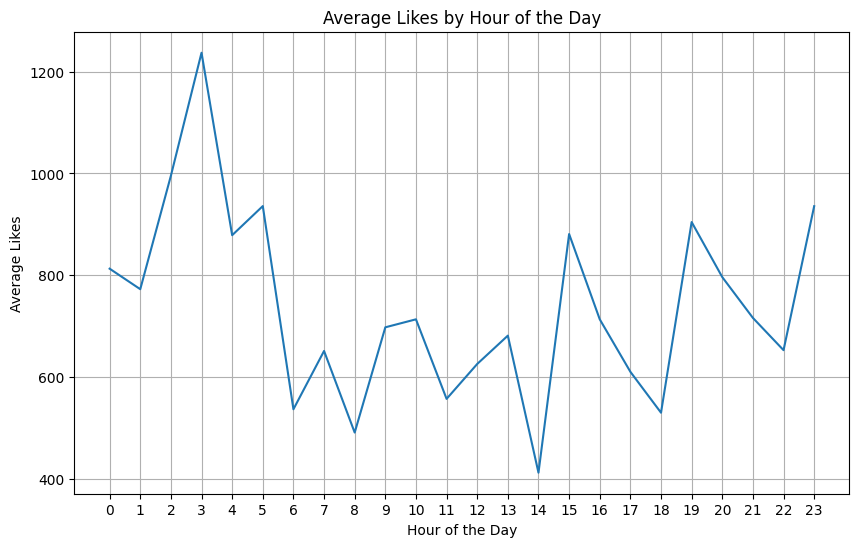

In [10]:

hourly_likes = df.groupby('hour')['likes'].mean().reset_index()

# Plotting hour vs average likes
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='likes', data=hourly_likes)
plt.title('Average Likes by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Likes')
plt.xticks(range(24))
plt.grid(True)
plt.show()

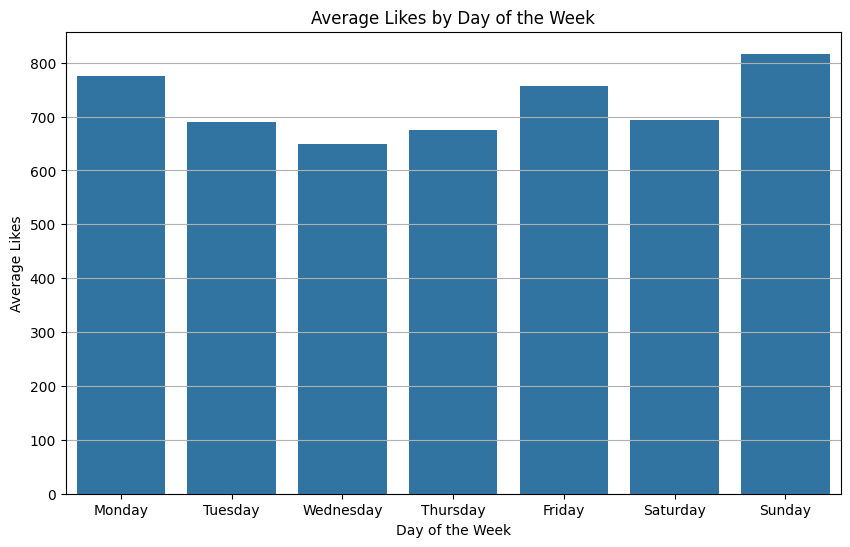

In [11]:

weekday_likes = df.groupby('day_of_week')['likes'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Plotting weekday vs average likes
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='likes', data=weekday_likes)
plt.title('Average Likes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.grid(axis='y')
plt.show()

In [12]:
df['has_media'].value_counts()

has_media
True    17331
Name: count, dtype: int64

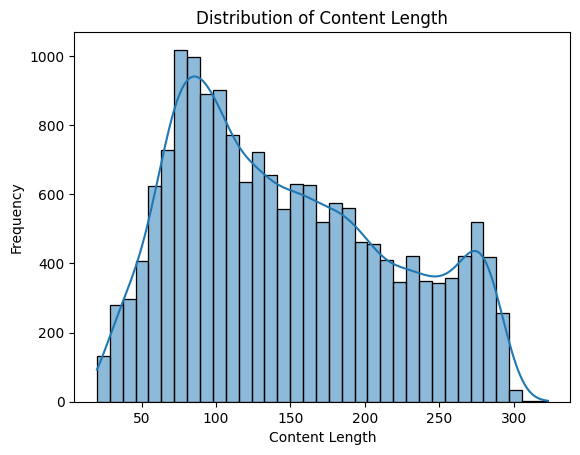

In [13]:
# Distribution of text length in 'content'
df['content_length'] = df['content'].apply(len)
sns.histplot(df['content_length'], kde=True)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()

In [14]:
'''These are likely features to use:

company, username
content → word_count, sentiment
media → has_media
datetime → hour, weekday
Bonus Ideas
Topic	              Use
WordClouds	  Visualize engaging keywords
TextBlob	    Get sentiment polarity
TF-IDF	      Later for text vectorization
t-SNE	        Explore clustering of content
Named Entity Recognition	See what brands/places are mentioned'''

'These are likely features to use:\n\ncompany, username\ncontent → word_count, sentiment\nmedia → has_media\ndatetime → hour, weekday\nBonus Ideas\nTopic\t              Use\nWordClouds\t  Visualize engaging keywords\nTextBlob\t    Get sentiment polarity\nTF-IDF\t      Later for text vectorization\nt-SNE\t        Explore clustering of content\nNamed Entity Recognition\tSee what brands/places are mentioned'

**WEEK 2 TASK**

In [15]:
from textblob import TextBlob

df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
from sklearn.preprocessing import LabelEncoder
from safe_label_encoder import SafeLabelEncoder
le = SafeLabelEncoder()

df['company_encoded'] = le.fit_transform(df['inferred company'])

In [17]:
import joblib
joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']

In [18]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# Apply the mapping to create a new numerical 'day_of_week_encoded' column
df['day_of_week_encoded'] = df['day_of_week'].map(day_mapping)

In [19]:
df['likes_log'] = np.log1p(df['likes'])
y = df['likes_log']

In [20]:
df.head(3)

,id,date,likes,content,username,media,inferred company,has_media,datetime,hour,day_of_week,word_count,char_count,content_length,sentiment,company_encoded,day_of_week_encoded,likes_log
0,1,2020-12-12 00:47:00,1,"spend your weekend morning with a ham, egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,True,2020-12-12 00:47:00,0,Saturday,29,181,181,0.175,166,6,0.693147
1,2,2018-06-30 10:04:20,2750,watch rapper <mention> freestyle for over an h...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,True,2018-06-30 10:04:20,10,Saturday,10,73,73,0.000,87,6,7.919720
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,True,2020-09-29 19:47:28,19,Tuesday,14,104,104,-0.100,35,2,4.060443


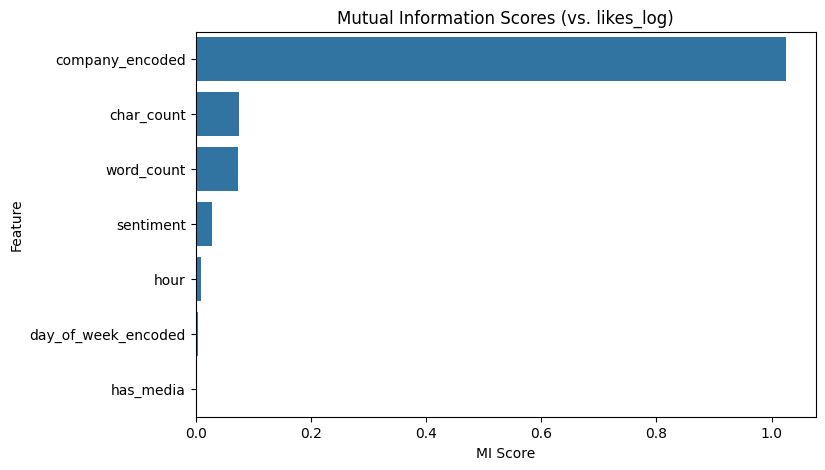

In [21]:
X = df[['word_count', 'char_count', 'has_media', 'hour', 'sentiment',
        'day_of_week_encoded', 'company_encoded']]

y = df['likes_log']

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=mi_scores.values, y=mi_scores.index)
plt.title("Mutual Information Scores (vs. likes_log)")
plt.xlabel("MI Score")
plt.ylabel("Feature")
plt.show()


training the model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib

X = df[['word_count', 'char_count', 'sentiment','company_encoded']]
y = df['likes_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = mean_squared_error(y_test, preds)
print("RMSE:", rmse)


RMSE: 1.8744726643449159


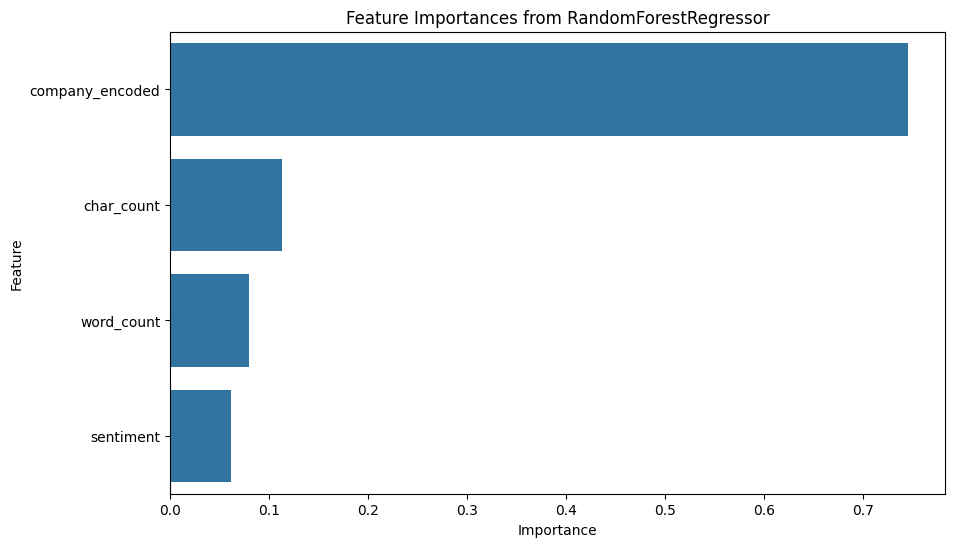

In [23]:
X = df[['word_count', 'char_count', 'sentiment','company_encoded']]
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances from RandomForestRegressor')
plt.show()


In [24]:

joblib.dump(model, 'like_predictor.pkl')

['like_predictor.pkl']

In [25]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('like_predictor.pkl')
@app.route('/')
def home():
    return "use '/predict' "
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = np.array([
        data['word_count'],
        data['char_count'],
        data['sentiment'],
        data['company_encoded']
    ]).reshape(1, -1)

    prediction = model.predict(features)[0]
    return jsonify({'predicted_likes': int(prediction)})

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
